# Upper Confidence Bound (UCB)

## Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## Importing the dataset

In [ ]:
dataset=pd.read_csv("Ads_CTR_Optimisation.csv")

## Implementing UCB

In [ ]:
import math
N=10000
d=10
ads_selected=[]
number_of_ads_selected=[0]*d
sum_of_each_ads=[0]*d
total_reward_ofads=0
#print(number_of_ads_selected,sum_of_each_ads)
for n in range(0,N):
    ad=0
    max_upper_bound=0
    for i in range(0,d):#based on given algorithm in folder it is coded
      if(number_of_ads_selected[i]>0):#if denominator is 0 it is inifinity see in else
        avg_reward=(sum_of_each_ads[i]/number_of_ads_selected[i])
#for this we need math library
#for log if we take i=0 it will give infinity which will be error, to avoid that taking from 1
        delta_i=math.sqrt(3/2 * math.log(n+1)/number_of_ads_selected[i])
        upper_bound=avg_reward+delta_i
      else:
        upper_bound=1e400 #this value almost equal to infinity

      if (upper_bound > max_upper_bound):
        max_upper_bound=upper_bound
        ad=i #this says that if the present ads index is having upper_bound > max_upper_bound, for the present
#round,it says that this ads index is best ads among all in this round

#based in this ad we  will intialize the parameters again outside the loop

  #should be given outerloop once one round is finished,at one round only one ads will be accepted
    ads_selected.append(ad)    #selected ad is chosen for the current round *****important line***
    number_of_ads_selected[ad]=number_of_ads_selected[ad]+1   #In the list of number_of_ads_selected, the index given by ad
    #which is selected by upper_bound is made(incremented) has 1 in the specified index.eg: if ads2(index) is selected by ad, making ads2 value in the list has 1
    #NOTE: it is incrementing the value in specified index, not incrementing the position
    reward=dataset.values[n,ad]#n=row ,ad=specific column, checks what value is given in this coloumn has reward=0 or 1, that is stored
    sum_of_each_ads[ad]=sum_of_each_ads[ad]+reward#here based on the index given by ad total no. of reward in each ads is added
    total_reward_ofads=total_reward_ofads+reward#this will add all the final numbers in the list





## Visualising the results

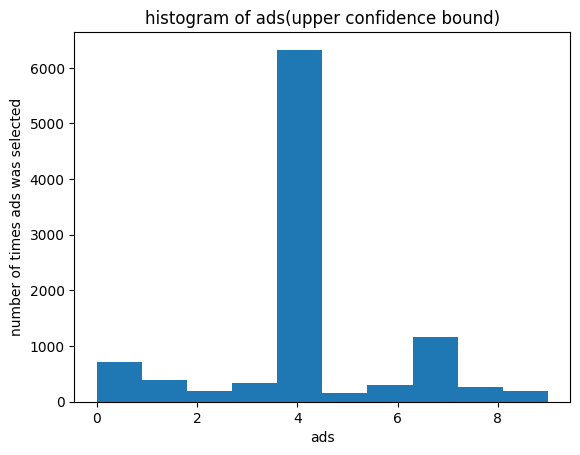

In [ ]:
plt.hist(ads_selected)
plt.title("histogram of ads(upper confidence bound)")
plt.xlabel("ads")
plt.ylabel("number of times ads was selected")
plt.show()

ads no:4 is the best advertisement
